# 02 Exploratory data analysis (EDA)

This notebook performs a comprehensive exploratory analysis on the Telco Customer Churn dataset.
It identifies patterns, distributions, correlations, outliers, and feature–churn relationships.

Imports libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Load Cleaned Data (from Notebook 01)

In [2]:
%run ./01_data_loading_and_cleaning.ipynb

print("Dataset loaded for EDA.")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

## 1. Dataset Overview

Overview

In [3]:
print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Feature Type Summary

In [4]:
print("\nCategorical Features:")
print(data.select_dtypes(include=['object']).columns.tolist())

print("\nNumerical Features:")
print(data.select_dtypes(include=['int64', 'float64']).columns.tolist())

print("\nUnique Value Counts:")
print(data.nunique())


Categorical Features:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Features:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Unique Value Counts:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## 2. Missing Values Overview


In [5]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing Values Heatmap

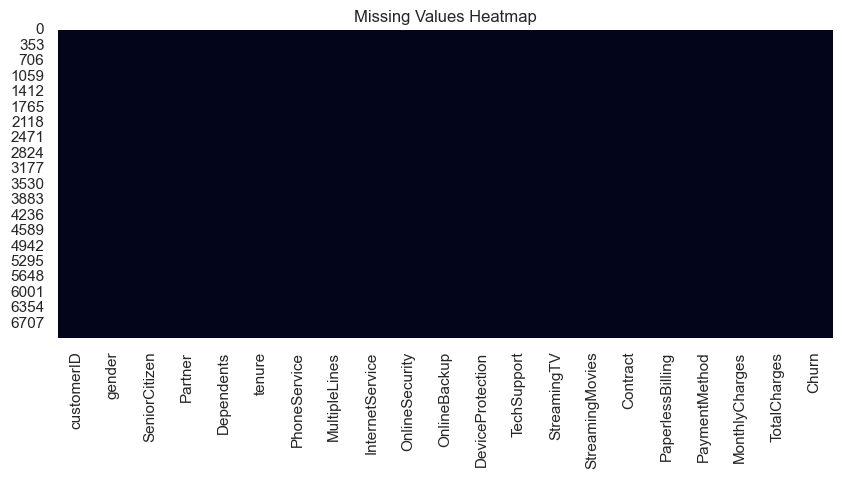

In [6]:
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## 3. Churn Distribution

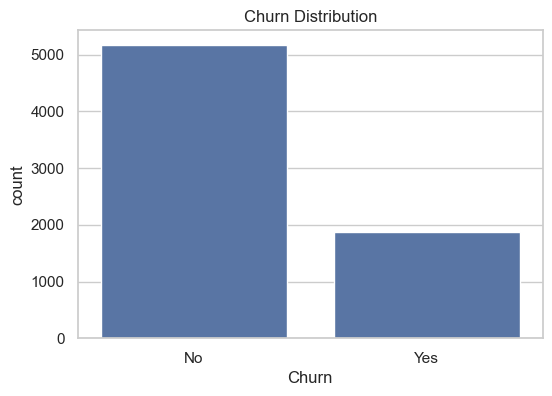

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

Churn percentage

In [8]:
(data['Churn'].value_counts(normalize=True) * 100).round(2)


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

## 4. Distribution of Numerical Features

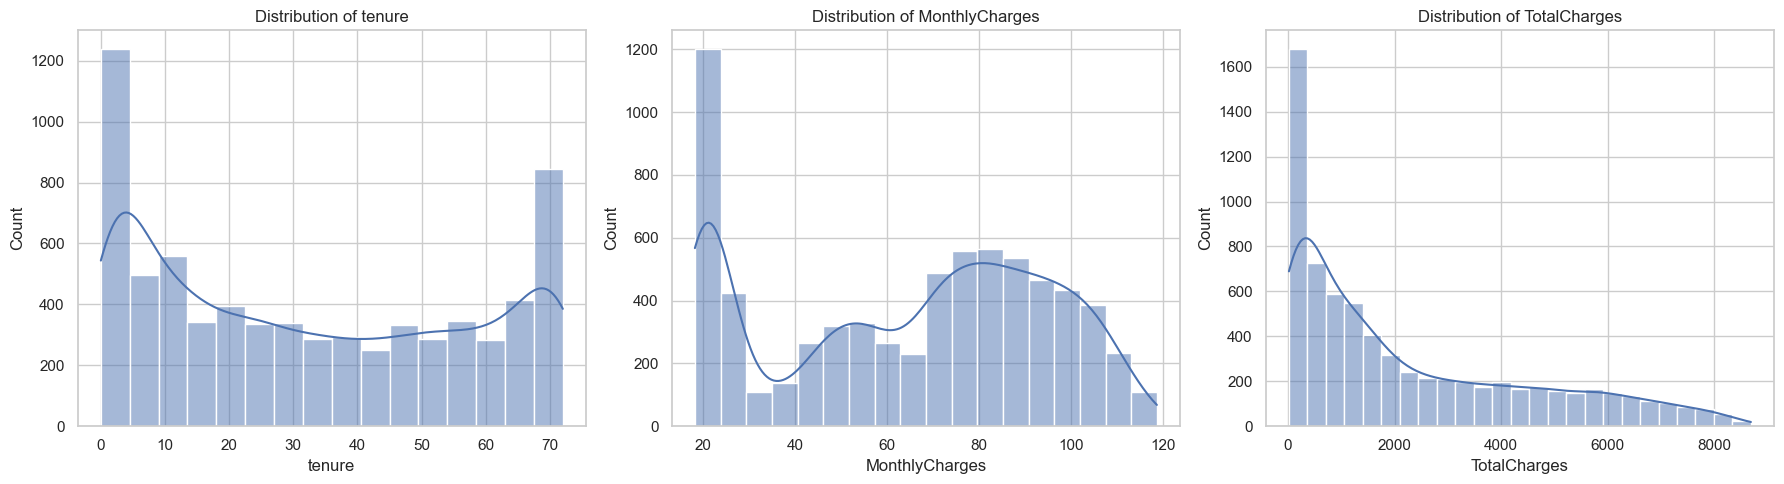

In [9]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for col, ax in zip(numeric_cols, axes):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## 5. Outlier Detection (Boxplots)

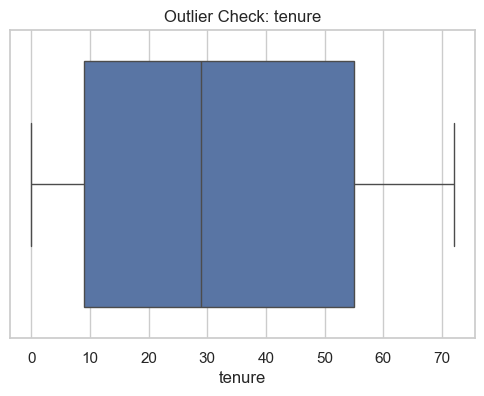

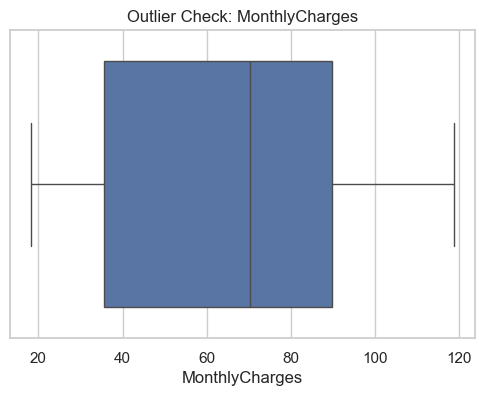

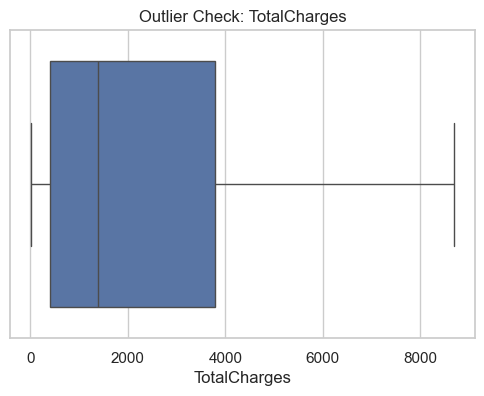

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()


## 6. Categorical Features vs Churn

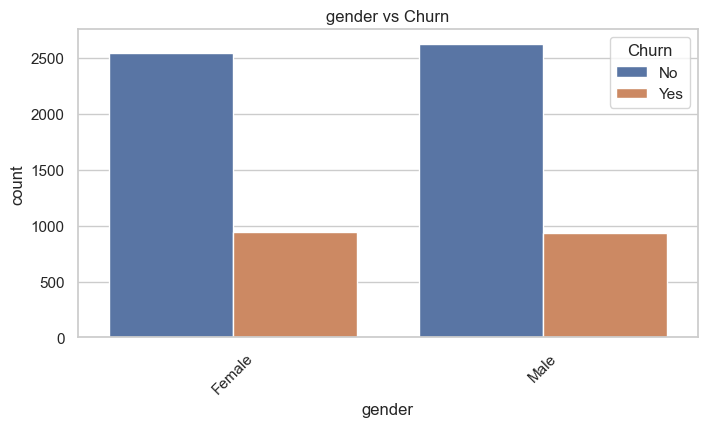

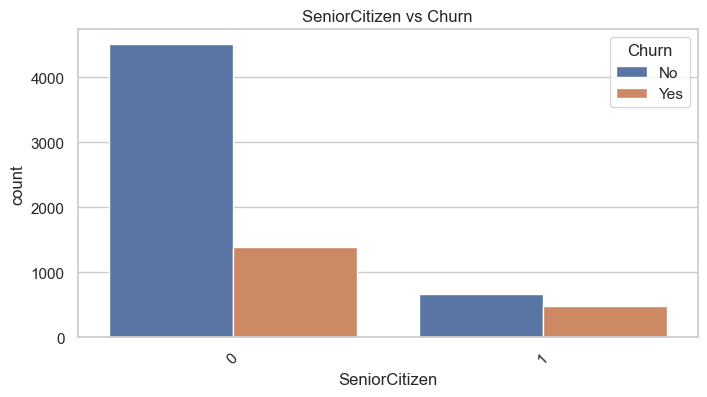

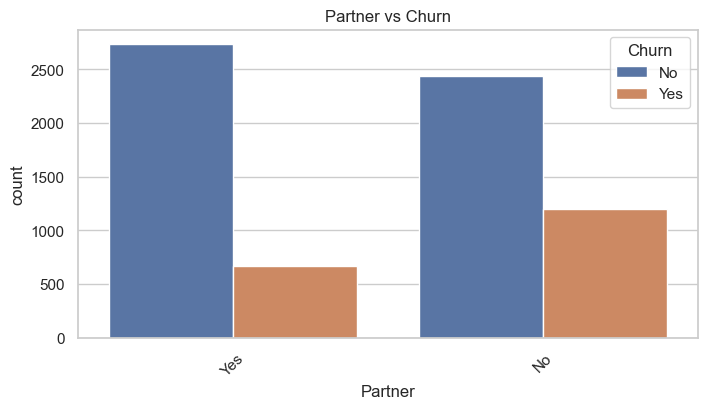

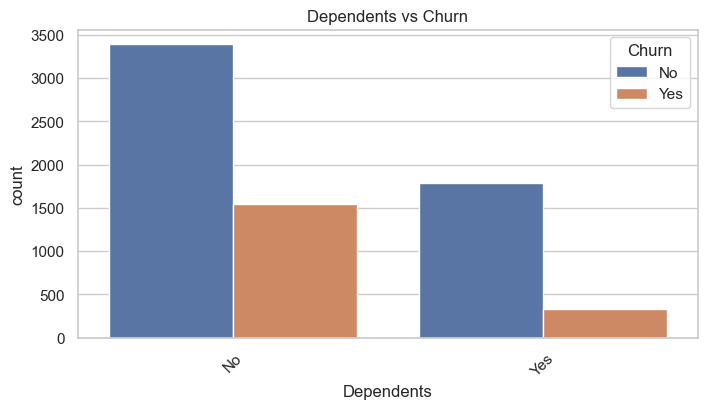

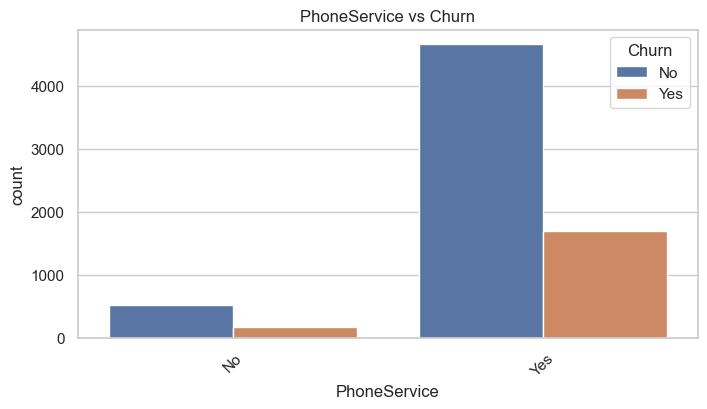

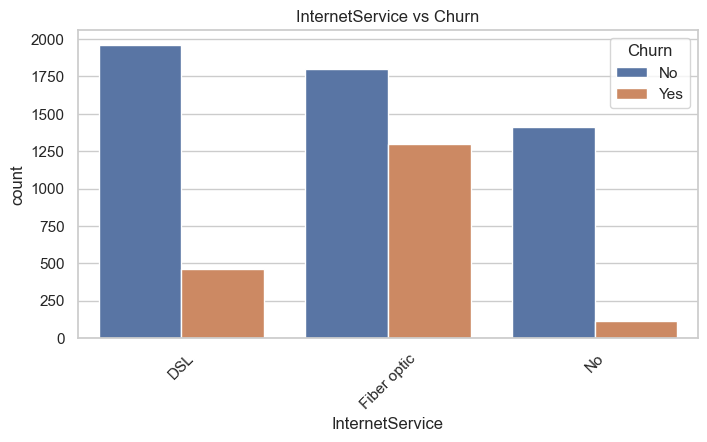

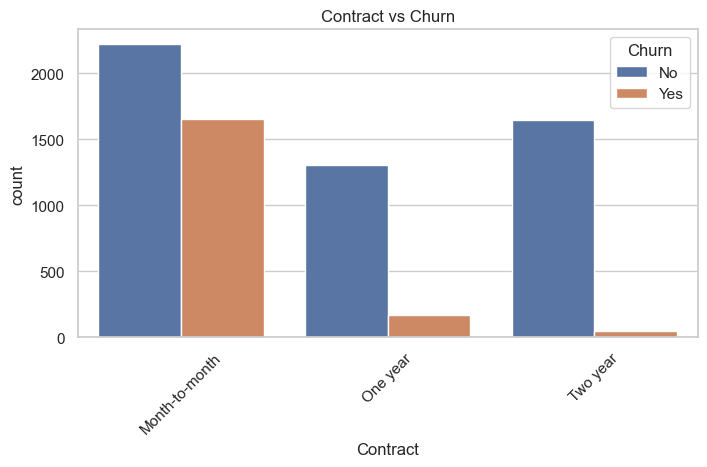

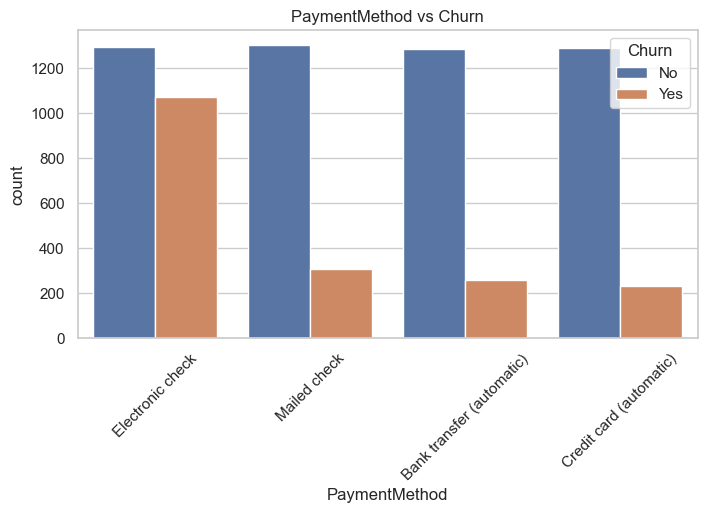

In [11]:
categorical_cols = [
    'gender','SeniorCitizen','Partner','Dependents',
    'PhoneService','InternetService','Contract','PaymentMethod'
]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

## 7. Tenure vs Churn

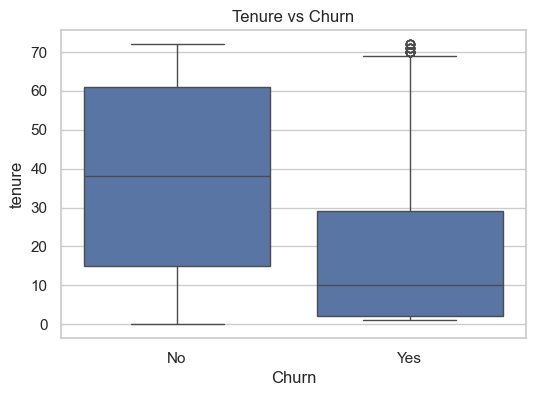

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.show()

## 8. Correlation Heatmap

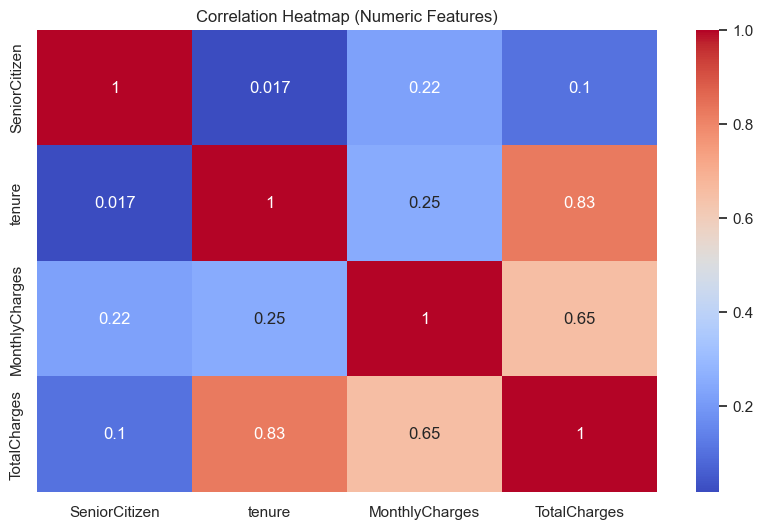

In [13]:
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## 9. EDA Summary

The Exploratory Data Analysis reveals the following insights:

- The dataset shows **class imbalance**, with fewer churned customers.
- Customers with **lower tenure** show a higher tendency to churn.
- **MonthlyCharges** and **TotalCharges** show moderate correlation with churn.
- Certain categories like
  **Contract type, Internet Service, and Payment Method**
  show strong differences between churned and non-churned groups.
- A few numerical features contain outliers, especially in `MonthlyCharges`.
- Missing values are minimal after cleaning.